In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Data Exploration 
*Finding any Null values,Changing Data type if Required,checking statistical relationship between different columns*

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

#### 0--> Non-Diabetic Patients
#### 1--> Diabetic Patients

In [6]:
df2=df.query('diabetes == 1')
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


# This Table represents that around 8500 people are diabetic

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Changing Data Type 

In [10]:
df = df.astype({'age': int})

# Data Visualization

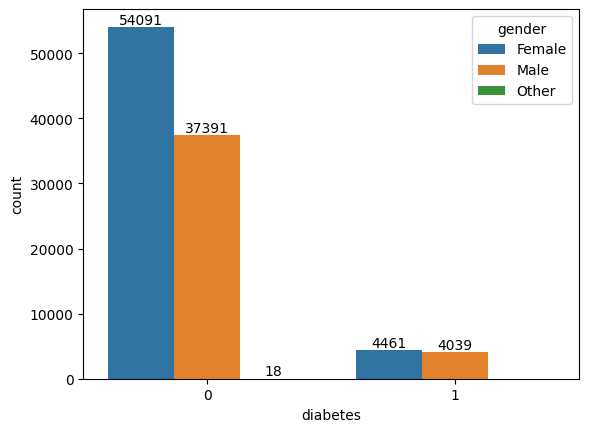

In [11]:
gen=sns.countplot(x='diabetes',data=df,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

Text(0.5, 1.0, 'Distribution of diabeties in dataset')

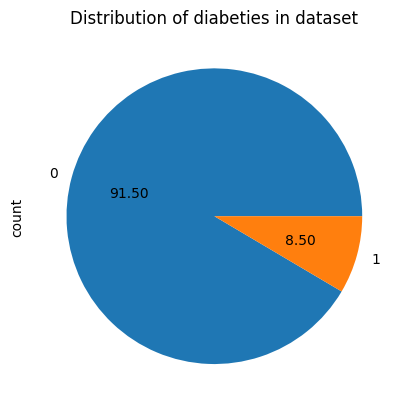

In [12]:
# Percentage of Non_diabetic vs Diabetic patients

import matplotlib.pyplot as plt
df['diabetes'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title("Distribution of diabeties in dataset")

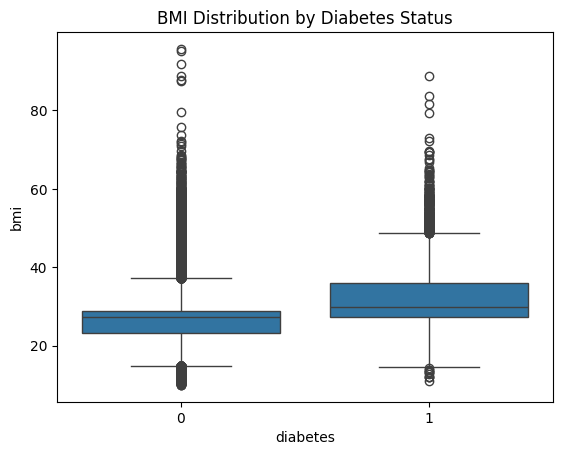

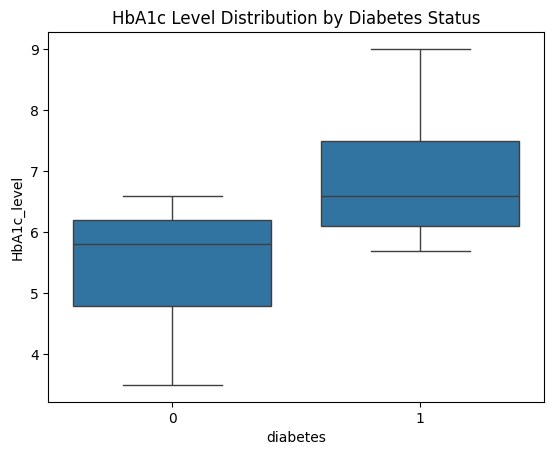

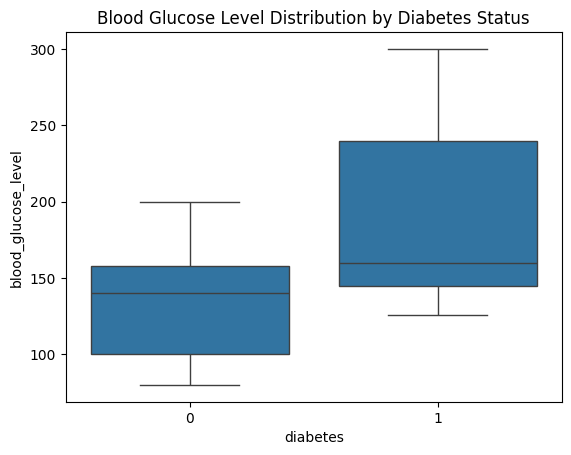

In [13]:
# Highlighting The major factors that causes diabetes using boxplot


sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="HbA1c_level", data=df)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

**The above Boxplots gives us the idea that people having bmi over 30 ,and hbac level over 6 and blood glucose level over 180 are having diabetes**

#  train/test/split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:8],df.iloc[:,-1],test_size=0.3,stratify=df.iloc[:,-1],random_state=42)

X_train.shape,X_test.shape

((70000, 8), (30000, 8))

In [15]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
54534,Female,56,0,1,never,39.51,4.0,100
7286,Male,64,0,0,former,27.32,6.6,90
44496,Male,49,0,0,never,42.26,6.0,240
86010,Male,68,0,0,No Info,27.32,4.8,85
44954,Male,62,0,0,not current,30.64,5.7,145


# Feature Engineering

# One Hot Encoding
## To Transform the categorical column into numerical column

In [16]:
trf1= ColumnTransformer([
    ('ohe_gender_smokinghistory',OneHotEncoder(sparse_output=False, handle_unknown='ignore')
,[0,4])
],remainder='passthrough')

# Scaling
## To scale down the values between range [-1 to 1]

In [17]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,15))
])

# Training The Model 
## Using DecisionTreeClassifier algorithm to train the model 

In [18]:
trf3 = DecisionTreeClassifier()

# Creating Pipeline

In [19]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [20]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3)

In [21]:
#train
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gender_smokinghistory',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [22]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

# Checking Accuracy of Training Dataset 

In [23]:
y_pred1=pipe.predict(X_train)
print("Accuracy of Training data set is : ",accuracy_score(y_train,y_pred1))

# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())


Accuracy of Training data set is :  0.9992285714285715
Accuracy after Cross Validation : 0.9510142857142856


# Checking Accuracy of Test Dataset

In [24]:
#Predict
y_pred = pipe.predict(X_test)
print("Accuracy of Test data set is : ",accuracy_score(y_test,y_pred))

# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_test, y_test, cv=5, scoring='accuracy').mean())

Accuracy of Test data set is :  0.9524666666666667
Accuracy after Cross Validation : 0.9525


In [25]:
import pickle
pickle.dump(pipe,open('pipe.pkl1','wb'))

In [26]:
pipe=pickle.load(open('pipe.pkl1','rb'))

***Testing Different Inputs for the model***

In [27]:
test_input=np.array(['male',50,1,1,'current',32.8,6.3,230],dtype=object).reshape(1,8)
prediction=pipe.predict(test_input)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")

[1]
The Person is Diabetic


In [28]:
test_input1=np.array(['male',50,0,1,'former',31.8,6.1,100],dtype=object).reshape(1,8)
prediction=pipe.predict(test_input1)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")

[0]
The Person is Not Diabetic


In [29]:
test_input2=np.array(['male',50,0,1,'former',34.8,6.4,200],dtype=object).reshape(1,8)
prediction=pipe.predict(test_input2)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")

[0]
The Person is Not Diabetic


# Conclusion
***People having higher bmi and high blood glucose level are most likely to be diabetic***

In [30]:
#TEST

In [31]:
import numpy as np

import joblib

In [32]:
# Load your model
pipe = joblib.load('pipe.pkl1')

# creating a mapping for all inputs
feature_mapping = {
    'gender': 'Enter gender (male/female): ',
    'age': 'Enter age: ',
    'hypertension': 'Enter hypertension (0 or 1): ',
    'heart_disease': 'Enter heart disease (current or former): ',
    'smoking_history': 'Enter smoking history (current or former): ',
    'bmi': 'Enter BMI: ',
    'HbA1c_level': 'Enter HbA1c level: ',
    'blood_glucose_level': 'Enter blood glucose level: ',
}

# Mapping for 'heart_disease' values so that it can convert string to numeric values
# You can use one hot encoder IF you want!!!
heart_disease_mapping = {
    'current': 1,
    'former': 0
}

# Create an empty list to store all values of the mapping 
values = []

# Run a loop to make sure user enters all values of mapping
for feature, prompt in feature_mapping.items():
    value = input(prompt)
    
    # To handle Edge case of heart disease
    if feature == 'heart_disease':
        value = value.lower()
        if value in heart_disease_mapping:
            values.append(heart_disease_mapping[value])
        else:
            print("Invalid input for heart disease. Please enter 'current' or 'former'.")
            exit(1)
    else:
        values.append(value)

# Convert the appropriate values to their respective data types
try:
    values[1] = int(values[1])
    values[2] = int(values[2])
    values[4] = 1 if values[4].lower() == 'current' else 0
    values[5] = float(values[5])
    values[6] = int(values[6])
    values[7] = int(values[7])
except (ValueError, IndexError):
    pass

# Construct the test_input numpy array
test_input = np.array([values], dtype=object)

# Make a prediction
prediction = pipe.predict(test_input)

# Check the prediction and provide an appropriate output
if prediction[0] == 1:
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")


The Person is Not Diabetic


In [33]:
#TEST

In [34]:
import joblib
import tkinter as tk

# Load your model
pipe = joblib.load('pipe.pkl1')

# Mapping for 'heart_disease' values so that it can convert string to numeric values
heart_disease_mapping = {
    'current': 1,
    'former': 0
}

# Create a function to handle the prediction
def predict_diabetes():
    values = []
    for feature, prompt in feature_mapping.items():
        value = input_fields[feature].get()
        
        # To handle the edge case of 'heart_disease'
        if feature == 'heart_disease':
            value = value.lower()
            if value in heart_disease_mapping:
                values.append(heart_disease_mapping[value])
            else:
                output_label.config(text="Invalid input for heart disease. Please enter 'current' or 'former'.")
                return
        else:
            values.append(value)
    
    # Convert the appropriate values to their respective data types
    try:
        values[1] = int(values[1])
        values[2] = int(values[2])
        values[4] = 1 if values[4].lower() == 'current' else 0
        values[5] = float(values[5])
        values[6] = int(values[6])
        values[7] = int(values[7])
    except (ValueError, IndexError):
        pass

    # Construct the test_input numpy array
    test_input = np.array([values], dtype=object)

    # Make a prediction
    prediction = pipe.predict(test_input)

    # Display the prediction in the terminal
    if prediction[0] == 1:
        output_label.config(text="The Person is Diabetic")
    else:
        output_label.config(text="The Person is Not Diabetic")

# Create a GUI window
root = tk.Tk()
root.title("Diabetes Prediction")

# Create input fields and labels
input_fields = {}
for feature, prompt in feature_mapping.items():
    label = tk.Label(root, text=prompt)
    label.pack()
    entry = tk.Entry(root)
    entry.pack()
    input_fields[feature] = entry

# Create a button to trigger the prediction
predict_button = tk.Button(root, text="Predict", command=predict_diabetes)
predict_button.pack()

# Create a label to display the output
output_label = tk.Label(root, text="")
output_label.pack()

# Start the GUI application
root.mainloop()
